<h2 style='color:purple' align='center'>Build our first neural network in Keras for image classification problem</h2>

**We will use keras fashion MNIST dataset. This consist of 60000 28X28 pixel images and 10000 test images, these images are classified in one of the 10 categories shown below**

<img src="slide1.png" />

**Each image is 28 x 28 pixel in dimension**

<img src='slide2.png' />

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
keras.backend.backend()

'tensorflow'

In [3]:
fm = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fm.load_data()

4423680/4422102 [==============================] - 10s 2us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
y_train[0]

9

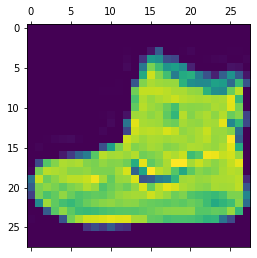

In [8]:
plt.matshow(X_train[0])

<h3 style='color:purple'>Normalize training data before training the neural net</h3>

In [9]:
X_train = X_train/255

In [10]:
X_test = X_test/255

<h3 style='color:purple'>Now build the Sequential Model and add layers into it</h3>

In [11]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

<img src='fashion_neural_net.png' />

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [14]:
model.fit(X_train, y_train)

Epoch 1/1
60000/60000 [==============================] - 7s 119us/step - loss: 0.5006 - accuracy: 0.8257


In [15]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 43us/step


[0.4327812371492386, 0.847599983215332]

**Above shows accuracy score of 82.76%. The first parameter is loss**

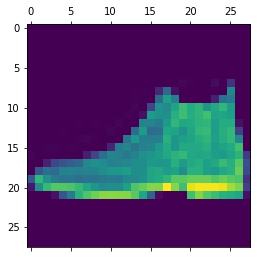

In [16]:
plt.matshow(X_test[0])

In [17]:
yp = model.predict(X_test)

In [18]:
np.argmax(yp[0])

9

In [21]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [19]:
class_labels[np.argmax(yp[0])]

NameError: name 'class_labels' is not defined

<h3 style='color:purple'>Exercise</h3>

Use keras mnist dataset from https://keras.io/datasets/ to build a neural network. Figure out,
    1. Optiomal number of hidden layers and neurons in each hidden layer that can give you best accuracy
    2. Optional accuracy score